In [1]:
from data_access.data_generation import DetailedDataGenerator
import matplotlib.pyplot as plt
from src.data_access.detailed_dataset_generation import  DetailedDatasetHandler

/home/mdronski/IET/semestr-8/UczenieMaszyn/YetAnotherSegmentationExperiment/venv37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mdronski/IET/semestr-8/UczenieMaszyn/YetAnotherSegmentationExperiment/venv37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mdronski/IET/semestr-8/UczenieMaszyn/YetAnotherSegmentationExperiment/venv37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it wi

In [2]:
clazz = ["adapter"]
difficulty = "easy"
data_handler = DetailedDatasetHandler(clazz, difficulty)

In [3]:
generators_and_chains = data_handler.prepare_generators_and_transformations()
train_chain, test_chain = data_handler.prepare_train_test_datasets()

training set


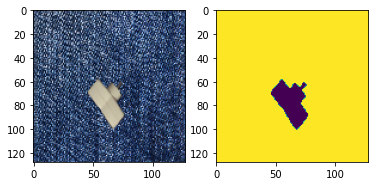

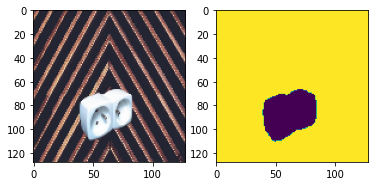

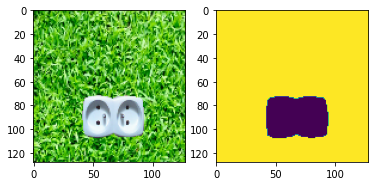

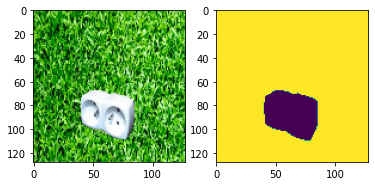

In [6]:
training_generator = DetailedDataGenerator(
    data=train_chain,
    batch_size=4
)
training_generator.on_epoch_end()

print("training set")
for X, y in training_generator[0]:
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(X)
    ax[1].imshow(y[:, :, 0]) 
    plt.show()


test set


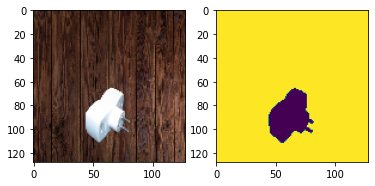

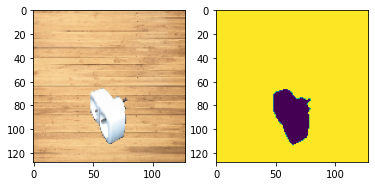

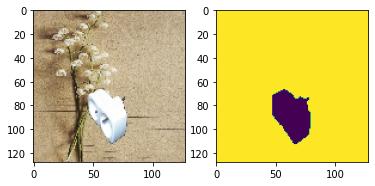

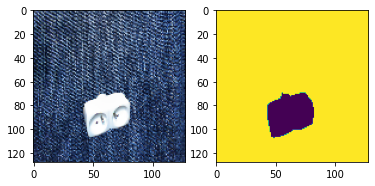

In [7]:
print("test set")

test_generator = DetailedDataGenerator(
    data=test_chain,
    batch_size=4
)
test_generator.on_epoch_end()

for X, y in test_generator[0]:
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(X)
    ax[1].imshow(y[:, :, 0]) 
    plt.show()